# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy
from dotenv import load_dotenv

# Working dir

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.preprocessing.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
load_dotenv()

# path to save figures
output_path = os.getenv("VIDEO_OUT")

# Global configuration path
glob_conf_path = '../global_config.py'

In [5]:
output_path

'/home/tim/work/su-thesis-project/emotional-recognition/files/tests/out/video/'

# Load global variables

In [6]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [27]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
frame,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE success = 1 
AND confidence >= 0.98 
AND mix = 0
AND emotion_1 in ('{}');
""".format("', '".join(basic_emotions.keys()))

df, read_duration = execute_sql_pandas(query)

In [28]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 54.735 seconds


In [30]:
df

,filename,video_id,emotion_1,emotion_1_id,frame,success,confidence,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A223_ang_p_4,A223,ang,12,1,1,1,0.00,0.00,0.70,...,0.92,0.62,0.30,0.33,1.84,0.17,0.59,0.00,0.0,0.00
1,A223_ang_p_4,A223,ang,12,2,1,1,0.03,0.00,0.81,...,0.97,0.61,0.27,0.27,1.84,0.11,0.37,0.00,0.0,0.07
2,A223_ang_p_4,A223,ang,12,3,1,1,0.03,0.00,0.86,...,1.02,0.63,0.24,0.17,1.82,0.05,0.32,0.00,0.0,0.07
3,A223_ang_p_4,A223,ang,12,4,1,1,0.00,0.00,0.86,...,1.07,0.69,0.27,0.12,1.80,0.05,0.41,0.00,0.0,0.05
4,A223_ang_p_4,A223,ang,12,5,1,1,0.00,0.00,0.89,...,1.08,0.75,0.29,0.18,1.85,0.00,0.51,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410215,A91_sad_p_3,A91,sad,6,196,1,1,0.04,0.00,0.00,...,0.64,0.71,0.00,0.00,0.00,0.00,0.00,1.64,0.0,0.03
410216,A91_sad_p_3,A91,sad,6,197,1,1,0.00,0.00,0.00,...,0.57,0.67,0.00,0.04,0.02,0.00,0.00,1.54,0.0,0.04
410217,A91_sad_p_3,A91,sad,6,198,1,1,0.00,0.01,0.00,...,0.50,0.64,0.00,0.10,0.02,0.00,0.00,1.44,0.0,0.02
410218,A91_sad_p_3,A91,sad,6,199,1,1,0.00,0.10,0.00,...,0.50,0.64,0.00,0.17,0.05,0.00,0.00,1.38,0.0,0.02


<AxesSubplot:>

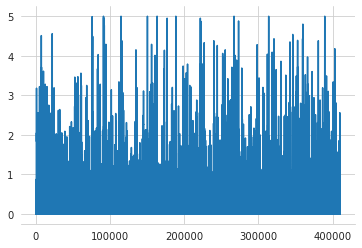

In [31]:
df['AU01_r'].plot()

Total number of instances: 410220

Number of Instances per File (before data cleaning)
A205_sad_v_3         1549
A205_sad_v_4         1437
A205_fea_v_1         1218
A205_sad_v_1         1214
A205_sad_v_2         1161
                     ... 
A34_int_v_1            37
A050121-R_ang_v_2      37
A303_hap_v_1           37
A332_hap_v_4           34
A050121-R_fea_p_1      33
Name: filename, Length: 2007, dtype: int64



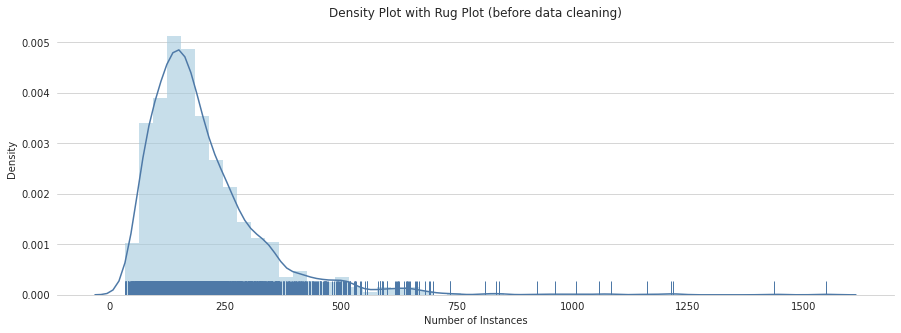


Number of Instances per Video id (before data cleaning)
A205         31472
A55          27404
A223         26011
A220         22220
A102         21585
A67          16615
A218         14396
A221         14364
A26          14322
A101         14120
A64          13902
A103         13366
A207         13311
A72          12504
A200         12241
A327         11309
A74          11137
A201         11129
A334         10697
A18          10502
A91          10481
A323          9808
A227          9429
A65           9420
A75           8949
A332          7214
A21           6979
A34           6973
A303          6846
A337          6672
A050121-R     4842
Name: video_id, dtype: int64


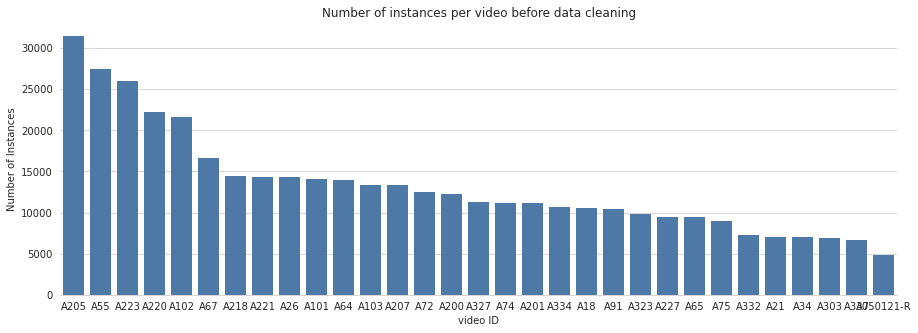


Number of Instances per Emotion (before data cleaning)
sad     59331
sha     55597
gui     55249
ang     50777
fea     49321
int     48368
disg    46731
hap     44846
Name: emotion_1, dtype: int64


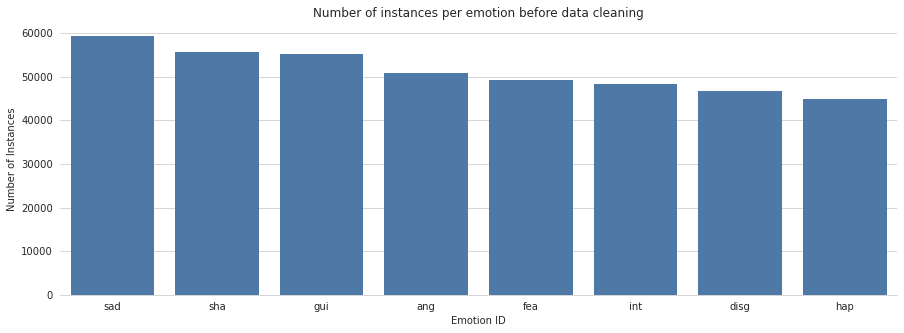


Number of Instances per Success Status (before data cleaning)
1    410220
Name: success, dtype: int64


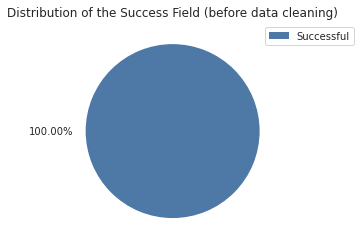


Percentage of Instances per Confidence Rate (before data cleaning)
1    1.0
Name: confidence, dtype: float64


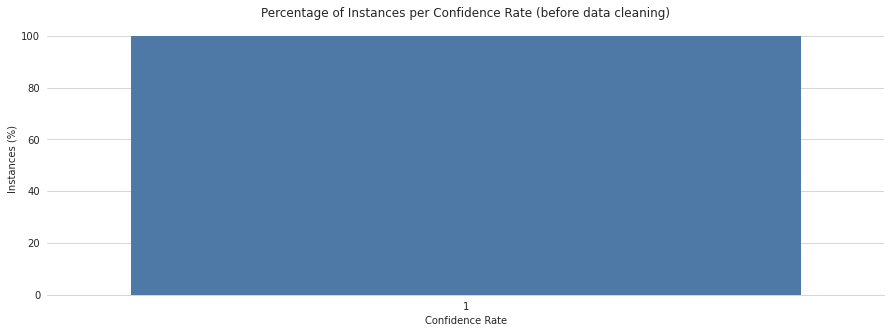

In [32]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

print("Number of Instances per Success Status (before data cleaning)")
success_val_counts_original = df["success"].value_counts()
print(success_val_counts_original)
plt.figure()
plt.pie(success_val_counts_original.values, autopct='%1.2f%%', pctdistance= 1.4, colors=palette_def)
plt.legend(['Successful','Unsuccessful'],bbox_to_anchor=(0.9, 1))
plt.savefig(os.path.join(output_path,'charts','report_success_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Distribution of the Success Field (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','success_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

print("Percentage of Instances per Confidence Rate (before data cleaning)")
confidence_val_counts_original = df["confidence"].value_counts(normalize=True).sort_index()
print(confidence_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(confidence_val_counts_original.index, 100*confidence_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.xlabel('Confidence Rate')
plt.ylabel('Instances (%)')
plt.savefig(os.path.join(output_path,'charts','report_confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Percentage of Instances per Confidence Rate (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

In [33]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
     video_id  filename
0   A050121-R        64
1        A101        64
2        A102        64
3        A103        64
4         A18        64
5        A200        64
6        A201        64
7        A205        64
8        A207        64
9         A21        64
10       A218        64
11       A220        64
12       A221        64
13       A223        64
14       A227        64
15        A26        64
16       A303        64
17       A323        64
18       A327        56
19       A332        61
20       A334        64
21       A337        64
22        A34        64
23        A55       107
24        A64        64
25        A65        64
26        A67        62
27        A72        64
28        A74        63
29        A75        58
30        A91        64



## Number of frames for every filename

Number of frames for every filename


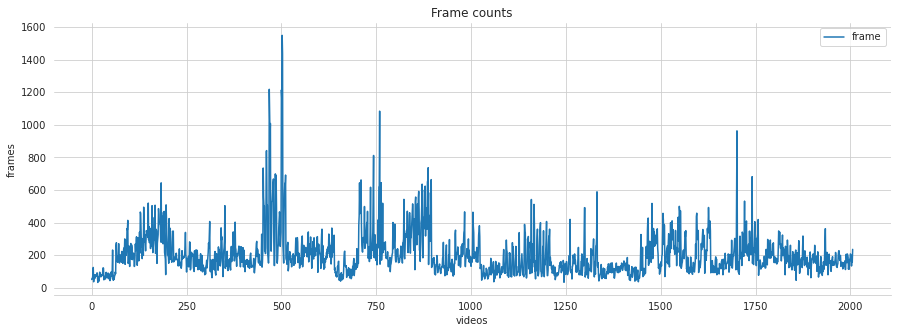

In [34]:
print("Number of frames for every filename")
frame_counts = df[['frame','filename']].groupby(["filename"]).frame.nunique().reset_index()
frame_counts.plot(figsize=(15,5))
plt.title("Frame counts")
plt.xlabel('videos')
plt.ylabel('frames')
plt.show()

# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [35]:
df.reset_index(drop = True, inplace=True)

In [36]:
from sklearn import preprocessing

# get the metadata from original dataframe

df_metadata = df[['filename', "frame", "video_id", "emotion_1_id"]]

print(df_metadata.shape)

# get only features
X = df.drop(columns=['filename', "frame", "video_id", "emotion_1", "emotion_1_id", "confidence", "success"])
# check for null values
print(np.isnan(np.sum(X)))


min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# check for null values
print(np.isnan(np.sum(X_scaled)))


# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())
print(X_scaled_df.isna().sum().sum())

print(X_scaled_df.shape)


# join back on index with filename dataframe
X_scaled_df = df_metadata.join(X_scaled_df)
print(X_scaled_df.isna().sum().sum())


(410220, 4)
AU01_r    False
AU02_r    False
AU04_r    False
AU05_r    False
AU06_r    False
AU07_r    False
AU09_r    False
AU10_r    False
AU12_r    False
AU14_r    False
AU15_r    False
AU17_r    False
AU20_r    False
AU23_r    False
AU25_r    False
AU26_r    False
AU45_r    False
dtype: bool
False
0
(410220, 17)
0


In [37]:
df_metadata

,filename,frame,video_id,emotion_1_id
0,A223_ang_p_4,1,A223,12
1,A223_ang_p_4,2,A223,12
2,A223_ang_p_4,3,A223,12
3,A223_ang_p_4,4,A223,12
4,A223_ang_p_4,5,A223,12
...,...,...,...,...
410215,A91_sad_p_3,196,A91,6
410216,A91_sad_p_3,197,A91,6
410217,A91_sad_p_3,198,A91,6
410218,A91_sad_p_3,199,A91,6


In [38]:
X_scaled_df

,filename,frame,video_id,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A223_ang_p_4,1,A223,12,0.000,0.000000,0.140,0.000000,0.0,0.0,...,0.186613,0.124,0.061602,0.066,0.368,0.034,0.118,0.000,0.0,0.000
1,A223_ang_p_4,2,A223,12,0.006,0.000000,0.162,0.000000,0.0,0.0,...,0.196755,0.122,0.055441,0.054,0.368,0.022,0.074,0.000,0.0,0.014
2,A223_ang_p_4,3,A223,12,0.006,0.000000,0.172,0.000000,0.0,0.0,...,0.206897,0.126,0.049281,0.034,0.364,0.010,0.064,0.000,0.0,0.014
3,A223_ang_p_4,4,A223,12,0.000,0.000000,0.172,0.000000,0.0,0.0,...,0.217039,0.138,0.055441,0.024,0.360,0.010,0.082,0.000,0.0,0.010
4,A223_ang_p_4,5,A223,12,0.000,0.000000,0.178,0.000000,0.0,0.0,...,0.219067,0.150,0.059548,0.036,0.370,0.000,0.102,0.000,0.0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410215,A91_sad_p_3,196,A91,6,0.008,0.000000,0.000,0.006098,0.0,0.0,...,0.129817,0.142,0.000000,0.000,0.000,0.000,0.000,0.328,0.0,0.006
410216,A91_sad_p_3,197,A91,6,0.000,0.000000,0.000,0.000000,0.0,0.0,...,0.115619,0.134,0.000000,0.008,0.004,0.000,0.000,0.308,0.0,0.008
410217,A91_sad_p_3,198,A91,6,0.000,0.002012,0.000,0.000000,0.0,0.0,...,0.101420,0.128,0.000000,0.020,0.004,0.000,0.000,0.288,0.0,0.004
410218,A91_sad_p_3,199,A91,6,0.000,0.020121,0.000,0.000000,0.0,0.0,...,0.101420,0.128,0.000000,0.034,0.010,0.000,0.000,0.276,0.0,0.004


<AxesSubplot:>

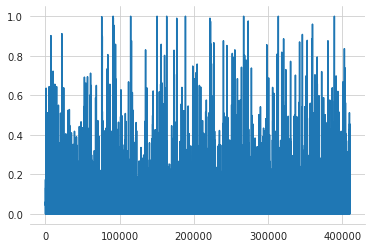

In [39]:
X_scaled_df['AU01_r'].plot()

In [41]:
save_path = os.path.join(output_path, 'video_data_time_series_reduced_basic_emotions_no_interpolation_unscaled.csv')
df.to_csv(save_path, index=None, header=True)